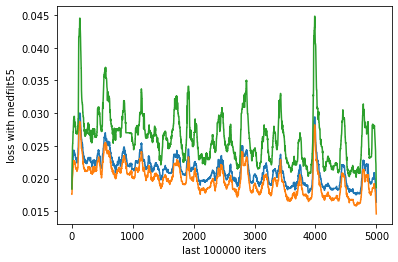

In [163]:
import pickle, os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt

model_dir = './'
list_path = os.path.join(model_dir, 'log_list.pkl')
save_path = os.path.join(model_dir, 'log_list_plot.png')
from_iter = 100000

config = pickle.load(open(os.path.join(model_dir, 'config.pkl'),'rb'))
from_log = from_iter // config.log_step

filt_size = 55

log_list = pickle.load(open(list_path,'rb'))
modified_list = [' '.join(line.split(',')[2:]).split(':')[1:] for line in log_list]
losses_list = [[losses[0][1:7],losses[1][1:7],losses[2][1:7]] for losses in modified_list]
plt.figure()
for i in range(len(losses_list[0])):
    plt.plot(medfilt(np.asarray([float(losses[i]) for losses in losses_list[from_log:]]),filt_size))
plt.xlabel(f'last {from_iter} iters')
plt.ylabel(f'loss with medfilt{filt_size}')
plt.savefig(save_path)

In [158]:
config.log_step

10

In [145]:
plt.figure()
for i in range(0,len(losses_list[0])):
    plt.plot(medfilt(np.asarray([float(losses[i]) for losses in losses_list[from_iter:]]),filt_size))
plt.savefig(save_path)

3